In [0]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
from mpl_toolkits.mplot3d import Axes3D

##PCA

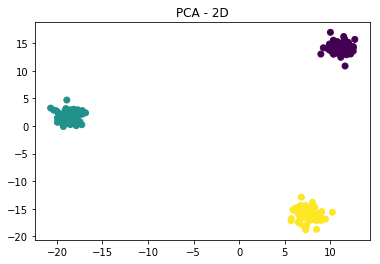

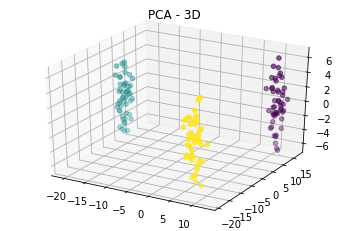

In [32]:
## Load the Data ##
X = np.genfromtxt("data-dimred-X.csv", dtype=float, delimiter=',').T
y = np.genfromtxt("data-dimred-y.csv", dtype=float, delimiter=',')

## Zero mean & Normalization ##
m0 = np.mean(X, axis=0)

## Centering the data ##
normalized = np.subtract(X, m0)

## Covariance matrix ##
C = np.cov(normalized.T)

## Computing the eigenvectors and eigenvalues ##
eivalues, eivectors = np.linalg.eigh(C)
eivectors = eivectors.T[::-1]

## plots ##
z = np.dot(normalized, eivectors[:3].T)
z = z.T 

## 2D plot ##
fig = plt.figure()
plt.scatter(z[0], z[1], c=y)
plt.title("PCA - 2D")
plt.show()

## 3D plot ##
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(z[0], z[1], z[2], c=y);
plt.title("PCA - 3D")
plt.show()


##LDA

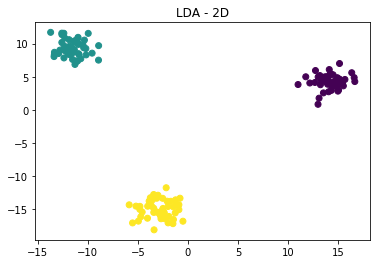

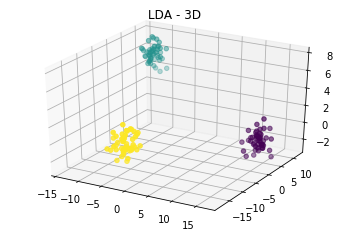

In [33]:
## Load the Data ##
X = np.genfromtxt("data-dimred-X.csv", dtype=float, delimiter=',').T
y = np.genfromtxt("data-dimred-y.csv", dtype=float, delimiter=',')

num_examples = X.shape[0]
num_features = X.shape[1]
num_classes = 3

num_examples_class = np.zeros(num_classes)
for i in range(num_classes):
  num_examples_class[i] = y[np.where(y==i+1)].size

u = np.zeros((num_classes, num_features))
cov = np.zeros((num_classes, num_features, num_features))
for i in range(num_classes):
  indices = np.where(y==i+1)[0]
  u[i, :] = np.mean(X[indices, :], axis=0)
  cov[i, :, :] = np.cov(X[indices, :].T)

## Scatter Matrix ##
S_w = np.zeros((num_features, num_features))
for i in range(num_classes):
  S_w = S_w + cov[i, :, :]

u_all = np.mean(X, axis=0)

## Between Class Scatter Matrix ##
S_b = np.zeros((num_features, num_features))
for i in range(num_classes):
  S_b = S_b + np.outer(u[i,:]-u_all, u[i,:]-u_all)

## Covariance matrix ##
C = np.dot(np.linalg.pinv(S_w), S_b)

## Computing the eigenvectors and eigenvalues ##
eivalues, eivectors = np.linalg.eigh(C)
eivectors = eivectors.T[::-1]

## Plots ##
z = np.dot(X, eivectors[:3].T)
z = z.T

## 2D plot ##
plt.scatter(z[0], z[1], c=y)
plt.title("LDA - 2D")
plt.show()

## 3D plot ##
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(z[0], z[1], z[2], c=y);
plt.title("LDA - 3D")
plt.show()



##LDA using SKLearn

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


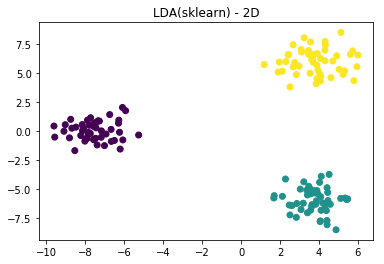

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis(n_components=2)
clf.fit(X, y)
z = clf.transform(X)

plt.scatter(z[:,0], z[:,1], c=y)
plt.title("LDA(sklearn) - 2D")
plt.savefig("pca_2d.png", bbox_inches="tight", pad_inches=0)
plt.show()